In [25]:
%load_ext autoreload
%autoreload 2

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt
from holt_linear import HoltLinear

warnings.filterwarnings('ignore')

# pip install ipykernel numpy pandas matplotlib statsmodels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


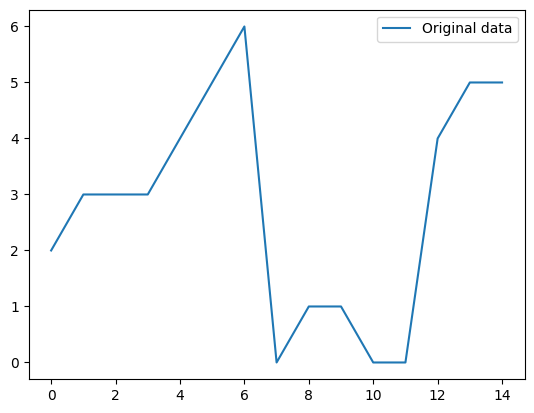

In [26]:
alpha = 0.5
beta = 0.3
data_raw = [2,3,3,3,4,5,6,0,1,1,0,0,4,5,5]
data = pd.Series(data_raw)
ax = data.plot(label="Original data")
ax
ax.legend()

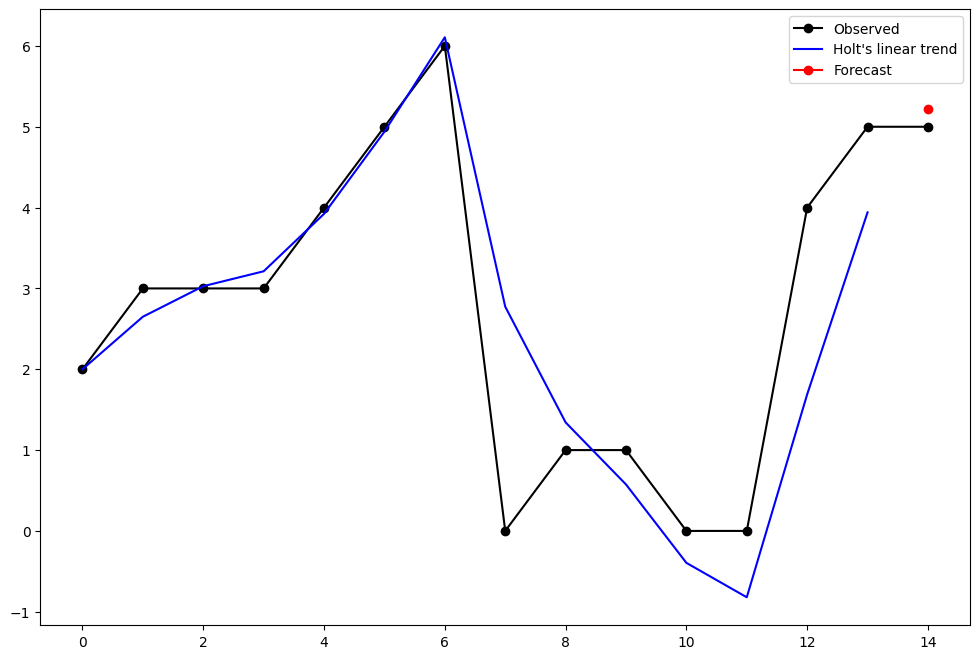

In [27]:
values = []
hl = HoltLinear(alpha=alpha, beta=beta)
for i in data:
    values.append(hl.update(i))

fcast1 = hl.forecast(1)

plt.figure(figsize=(12, 8))
plt.plot(
    data,
    marker="o",
    color="black",
    label="Observed",
)
plt.plot(
    values[:-1],
    color="blue",
    label="Holt's linear trend",
)
(line1,) = plt.plot(
    len(values) - 1,
    fcast1,
    marker="o",
    color="red",
    label="Forecast",
)
plt.legend()


# StatsModel implementation

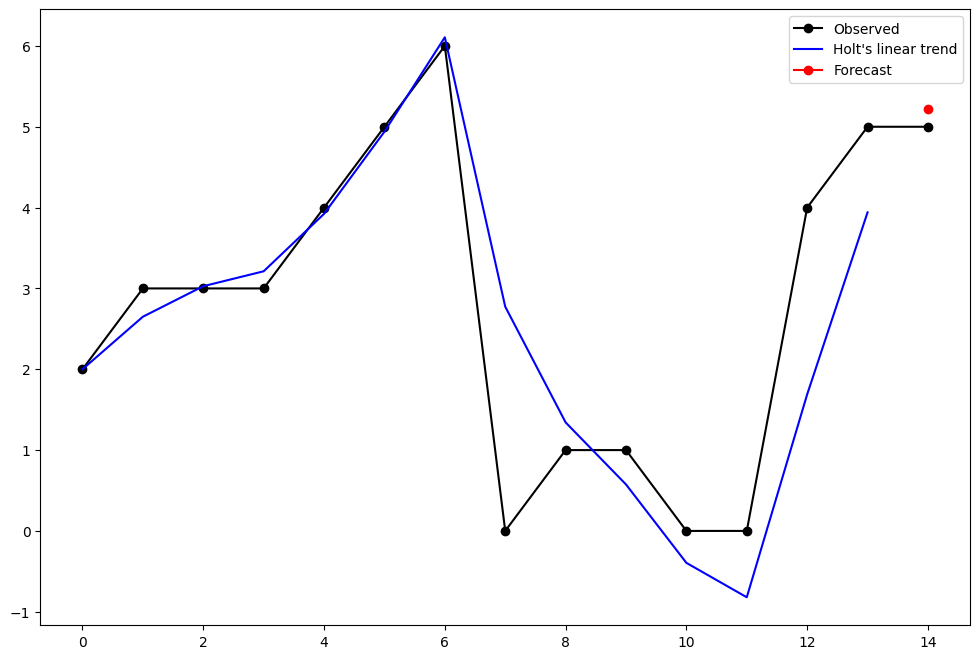

In [28]:
fit = Holt(
    data[1:],
    initialization_method="known",
    initial_level=data[0],
    initial_trend=0,
).fit(
    smoothing_level=alpha,
    smoothing_trend=beta,
)
fcast1 = fit.forecast(1).rename("Holt's linear trend")

plt.figure(figsize=(12, 8))
plt.plot(
    data,
    marker="o",
    color="black",
    label="Observed",
)
plt.plot(
    np.arange(0, fit.fittedvalues.size, 1),
    fit.fittedvalues,
    color="blue",
    label="Holt's linear trend",
)
(line1,) = plt.plot(
    len(data) - 1,
    fcast1,
    marker="o",
    color="red",
    label="Forecast",
)
plt.legend()
